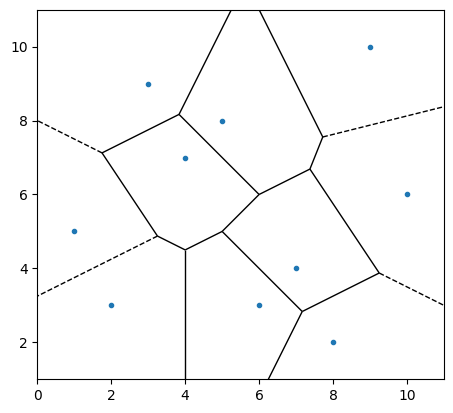

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def compute_tessellation(points):
    # Compute the Voronoi diagram
    vor = Voronoi(points)

    # Plot the Voronoi diagram
    fig, ax = plt.subplots()
    voronoi_plot_2d(vor, ax=ax, show_vertices=False)

    # Set plot limits and display the plot
    ax.set_xlim(min(points[:, 0]) - 1, max(points[:, 0]) + 1)
    ax.set_ylim(min(points[:, 1]) - 1, max(points[:, 1]) + 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return vor

# Example points
points = np.array([
    [2, 3], [5, 8], [7, 4], [9, 10], [4, 7],
    [6, 3], [8, 2], [1, 5], [3, 9], [10, 6]
])

# Compute and plot the Dirichlet tessellation
voronoi_diagram = compute_tessellation(points)


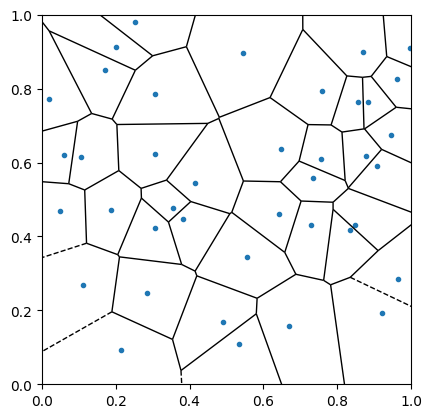

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def compute_tessellation(num_points):
    points = np.random.rand(num_points, 2)

    # Compute the Voronoi diagram
    vor = Voronoi(points)

    # Plot the Voronoi diagram
    fig, ax = plt.subplots()
    voronoi_plot_2d(vor, ax=ax, show_vertices=False)

    # Set plot limits and display the plot
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return vor


num_points = 40  # Change the number of points here
voronoi_diagram = compute_tessellation(num_points)


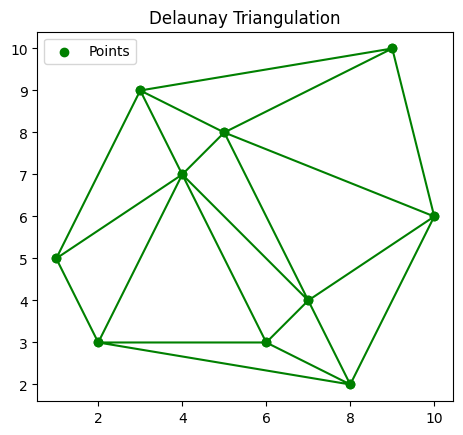

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d

points = np.array([
    [2, 3], [5, 8], [7, 4], [9, 10], [4, 7],
    [6, 3], [8, 2], [1, 5], [3, 9], [10, 6]
])

# 1. Delaunay Triangulation
tri = Delaunay(points)

fig, ax = plt.subplots()
ax.triplot(points[:,0], points[:,1], tri.simplices, 'go-')
ax.scatter(points[:, 0], points[:, 1], color='green', label='Points')
ax.set_title("Delaunay Triangulation")
ax.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



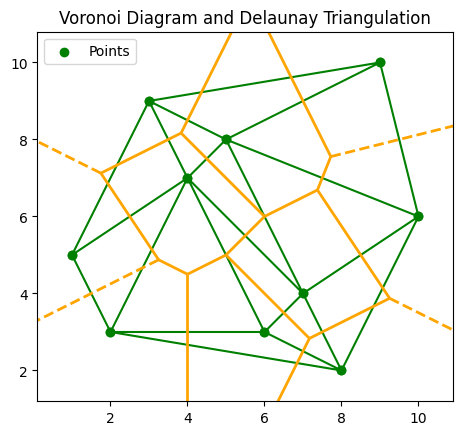

In [ ]:

# 2. Voronoi Diagram and Delaunay Triangulation
vor = Voronoi(points)

fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2)
ax.triplot(points[:,0], points[:,1], tri.simplices, 'go-')
ax.scatter(points[:, 0], points[:, 1], color='green', label='Points')
ax.set_title("Voronoi Diagram and Delaunay Triangulation")
ax.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

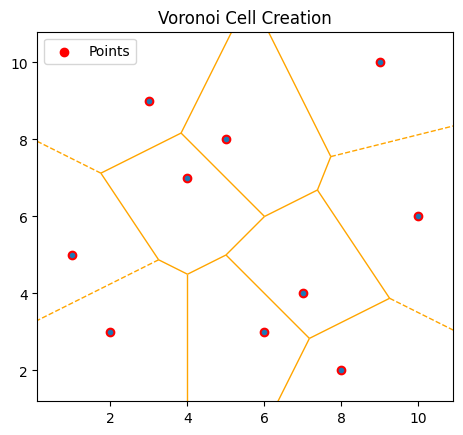

In [ ]:

# 3. Voronoi Cell Creation
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange')
ax.scatter(points[:, 0], points[:, 1], color='red', label='Points')
ax.set_title("Voronoi Cell Creation")
ax.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

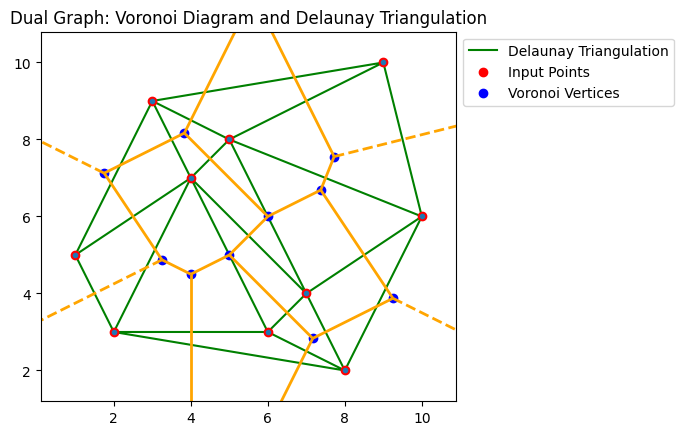

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d

points = np.array([
    [2, 3], [5, 8], [7, 4], [9, 10], [4, 7],
    [6, 3], [8, 2], [1, 5], [3, 9], [10, 6]
])

# 1. Delaunay Triangulation
tri = Delaunay(points)

# Function to calculate circumcenters of Delaunay triangles
def compute_circumcenters(tri, points):
    circumcenters = []
    for simplex in tri.simplices:
        # Get the three vertices of the triangle
        vertices = points[simplex]
        A = vertices[0]
        B = vertices[1]
        C = vertices[2]

        # Compute circumcenter (circumcenter of the triangle)
        D = 2 * (A[0] * (B[1] - C[1]) + B[0] * (C[1] - A[1]) + C[0] * (A[1] - B[1]))
        Ux = ((np.linalg.norm(A) ** 2) * (B[1] - C[1]) +
              (np.linalg.norm(B) ** 2) * (C[1] - A[1]) +
              (np.linalg.norm(C) ** 2) * (A[1] - B[1])) / D
        Uy = ((np.linalg.norm(A) ** 2) * (C[0] - B[0]) +
              (np.linalg.norm(B) ** 2) * (A[0] - C[0]) +
              (np.linalg.norm(C) ** 2) * (B[0] - A[0])) / D
        circumcenters.append([Ux, Uy])
    return np.array(circumcenters)

circumcenters = compute_circumcenters(tri, points)

# 2. Voronoi Diagram and Delaunay Triangulation Overlay
vor = Voronoi(points)

# Plot Delaunay Triangulation and Voronoi diagram (Dual Graph Construction)
fig, ax = plt.subplots()

# Delaunay Triangulation
ax.triplot(points[:,0], points[:,1], tri.simplices, 'g-', label="Delaunay Triangulation")
ax.scatter(points[:, 0], points[:, 1], color='red', label='Input Points')

# Plot circumcenters (Voronoi vertices)
ax.scatter(circumcenters[:, 0], circumcenters[:, 1], color='blue', label='Voronoi Vertices')

# Plot Voronoi edges
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2)
ax.set_title("Dual Graph: Voronoi Diagram and Delaunay Triangulation")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
